In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import util
% matplotlib inline 

### Read Training dataset

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_hollydays = pd.read_csv('data/cities_with_student_holidays.txt', header=None)

- ### Sets Date index, adds DOW

In [4]:
df_train["old_Date"] = df_train["Date"]
df_train["Date"] = pd.to_datetime(df_train.Date, dayfirst=False, infer_datetime_format=True)
df_train = df_train.set_index('Date', drop=True, inplace=False).sort_index()
df_train["dow"] = df_train.index.dayofweek
df_train.head()

,City,Doctors allocated,Nr_patients,Deaths from lack of doctors,Hospital Type,National Holiday,News on local media about deseases,Students on Holiday,Hospital active,old_Date,dow
Date,,,,,,,,,,,
2016-01-04,Vila Real,0,0,0.0,Health center,1,0,1,0,2016-01-04,0
2016-01-04,São Vicente,0,0,0.0,Health center,1,0,1,0,2016-01-04,0
2016-01-04,Castelo Branco,0,0,0.0,Hybrid,1,0,1,0,2016-01-04,0
2016-01-04,Bombarral,0,0,0.0,Health center,1,0,1,0,2016-01-04,0
2016-01-04,Oliveira de Azeméis,0,0,0.0,Hybrid,1,0,1,0,2016-01-04,0


In [5]:
df_train.shape

(260103, 11)

- ### Adds Col DocReq, DocAllocVsReq_Ratio

In [6]:
# Drop hospital closed
df_train = df_train[df_train["Hospital active"] == 1]
df_train.drop(columns="Hospital active", inplace=True)

# Creates Ration of Doctors allocation
df_train["DocReq"] = np.ceil(df_train["Nr_patients"] / 15)
df_train["DocAllocVsReq_Ratio"] = df_train["Doctors allocated"] / df_train["DocReq"]
df_train.head()

,City,Doctors allocated,Nr_patients,Deaths from lack of doctors,Hospital Type,National Holiday,News on local media about deseases,Students on Holiday,old_Date,dow,DocReq,DocAllocVsReq_Ratio
Date,,,,,,,,,,,,
2016-01-04,Viseu,196,552,0.0,Main hospital,1,0,1,2016-01-04,0,37.0,5.297297
2016-01-04,Salvaterra de Magos,61,557,0.0,Health center,1,0,1,2016-01-04,0,38.0,1.605263
2016-01-04,Cascais,302,1834,0.0,Main hospital,1,0,1,2016-01-04,0,123.0,2.455285
2016-01-04,Guimarães,213,654,0.0,Main hospital,1,0,1,2016-01-04,0,44.0,4.840909
2016-01-04,Amadora,195,859,0.0,Main hospital,1,0,1,2016-01-04,0,58.0,3.362069


In [7]:
df_train.shape

(216149, 12)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216149 entries, 2016-01-04 to 2018-05-19
Data columns (total 12 columns):
City                                  216149 non-null object
Doctors allocated                     216149 non-null int64
Nr_patients                           216149 non-null int64
Deaths from lack of doctors           216149 non-null float64
Hospital Type                         216149 non-null object
National Holiday                      216149 non-null int64
News on local media about deseases    216149 non-null int64
Students on Holiday                   216149 non-null int64
old_Date                              216149 non-null object
dow                                   216149 non-null int64
DocReq                                216149 non-null float64
DocAllocVsReq_Ratio                   216149 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 26.4+ MB


In [9]:
df_train.nunique()

City                                   308
Doctors allocated                      144
Nr_patients                           3098
Deaths from lack of doctors             46
Hospital Type                            4
National Holiday                         2
News on local media about deseases       2
Students on Holiday                      2
old_Date                               866
dow                                      7
DocReq                                 298
DocAllocVsReq_Ratio                   6894
dtype: int64

In [10]:
t = df_train.copy()
t = t[t["DocAllocVsReq_Ratio"]<1]
print(t.shape)


(566, 12)


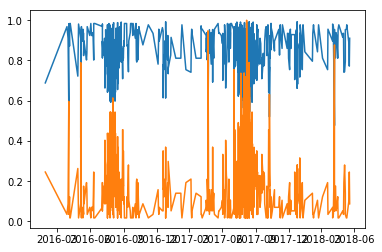

In [11]:
t["MMn"] = t["Deaths from lack of doctors"] / t["Deaths from lack of doctors"].max()
plt.plot(t["DocAllocVsReq_Ratio"])
plt.plot(t["MMn"])
plt.show()

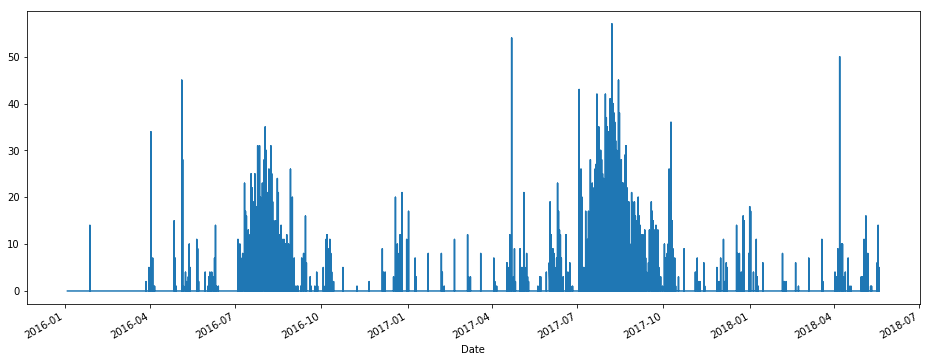

In [12]:
df_train["Deaths from lack of doctors"].plot(figsize=(16,6))

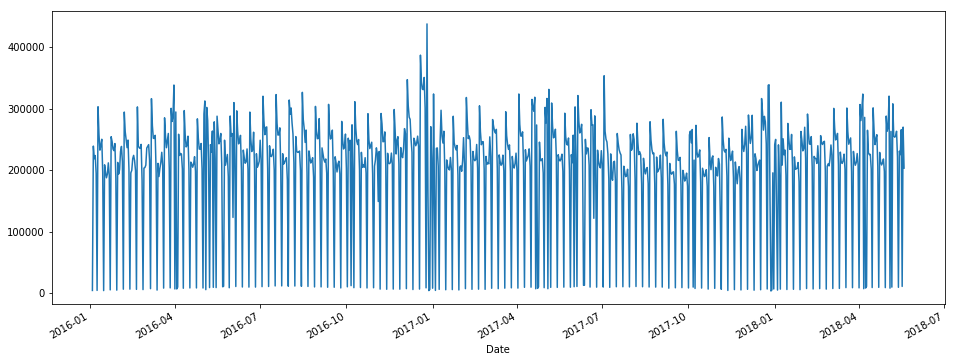

In [13]:
df_train.groupby("Date")["Nr_patients"].sum().plot(figsize=(16,6))

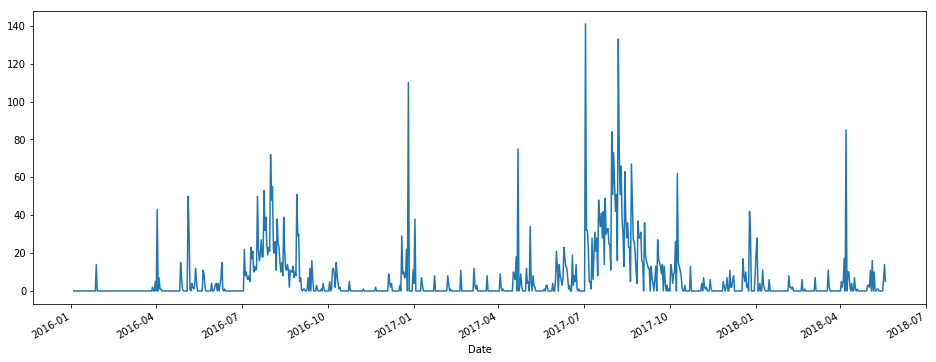

In [14]:
df_train.groupby("Date")["Deaths from lack of doctors"].sum().plot(figsize=(16,6))

### Filters by May

In [15]:
def get_May_weeks(df_):
    df_new = df_.copy()
    return df_new[df_new.index.month == 5]

In [16]:
def get_average_by_dow(df_):
    df_new = df_.copy()
    return df_new.groupby(["City", "dow"])["DocReq"].mean()

In [17]:
def get_average_by_std(df_):
    df_new = df_.copy()
    return df_new.groupby(["City", "dow"])["DocReq"].quantile(q=0.95)

In [18]:
may_weeks = get_May_weeks(df_train)
mean_patients_per_DOW_city = get_average_by_dow(may_weeks)

In [19]:
mean_patients_per_DOW_city.head(14)

City             dow
Abrantes         0      70.000000
                 1      60.538462
                 2      64.727273
                 3      63.000000
                 4      65.300000
                 5      65.545455
Aguiar da Beira  0      36.818182
                 1      34.307692
                 2      37.000000
                 3      36.500000
                 4      42.200000
                 5      38.454545
Alandroal        0      41.181818
                 1      36.923077
Name: DocReq, dtype: float64

In [20]:
# Nao quebra os 300.000 pacientes max/dia
mean_patients_per_DOW_city.groupby("dow").sum()

dow
0    18345.926768
1    17040.461150
2    17053.858586
3    17279.187626
4    17856.226696
5    14454.388636
6      655.636364
Name: DocReq, dtype: float64

In [21]:
mean_patients_per_DOW_city = get_average_by_std(may_weeks)
mean_patients_per_DOW_city.groupby("dow").sum()

dow
0    21403.25
1    20127.65
2    20330.50
3    21370.30
4    21366.60
5    17024.60
6      794.10
Name: DocReq, dtype: float64

In [22]:
df_train.groupby("dow")["Deaths from lack of doctors"].sum()

dow
0    1786.0
1     819.0
2     703.0
3     731.0
4     591.0
5     768.0
6     197.0
Name: Deaths from lack of doctors, dtype: float64

# Test DF

In [23]:
df_test.nunique()

Date                 4
City               308
Hospital active      2
nr_doctors           0
dtype: int64

In [33]:
def get_hollidays():
    return pd.read_csv('data/cities_with_student_holidays.txt', header=None, delimiter="'")[1].tolist()
holl = get_hollidays()
holl

['Alcanena',
 'Alfândega da Fé',
 'Arronches',
 'Azambuja',
 'Beja',
 'Belmonte',
 'Fundão',
 'Guarda',
 'Lajes das Flores',
 'Melgaço',
 'Mogadouro',
 'Palmela',
 'Santa Cruz da Graciosa',
 'Santana',
 'Seixal',
 'Sines',
 'Torres Vedras',
 'Évora',
 'Ílhavo']

In [45]:
def get_test_holliday_df(df_):
    df_new = df_copy()
    df_new["isHolliday"] = df_new["City"].isin(holl).astype(int)
    return df_new
get_test_holliday_df(df_test)

NameError: name 'df_copy' is not defined

,Date,City,Hospital active,nr_doctors,isHolliday
5,2018-05-20,Alcanena,0,NaN,True
11,2018-05-20,Alfândega da Fé,0,NaN,True
34,2018-05-20,Arronches,0,NaN,True
38,2018-05-20,Azambuja,0,NaN,True
44,2018-05-20,Beja,0,NaN,True
45,2018-05-20,Belmonte,0,NaN,True
103,2018-05-20,Fundão,0,NaN,True
109,2018-05-20,Guarda,0,NaN,True
117,2018-05-20,Lajes das Flores,0,NaN,True
140,2018-05-20,Melgaço,0,NaN,True
